In [1]:
import numpy as np

In [2]:
# current values
TOTAL_DURATION = 450.
LEAD_IN_DURATION = 6.
EQUATION_DURATION = 2.
ISI1 = 0.5
COMPARISON_DURATION = 5.
ISI2 = 0.5
FEEDBACK_DURATION = 2.
ITI = 0.5
END_SCREEN_DURATION = 6.

duration_left = TOTAL_DURATION - (LEAD_IN_DURATION + END_SCREEN_DURATION)

In [3]:
# parameters to test
ranges = {
    'equation': (2, 5),
    'isi1': (0.5, 2.5),
    'comparison': (2, 6),
    'isi2': (0.5, 2.5),
    'feedback': (.5, 1.5),
    'iti': (0.5, 10.5),
}

n_trials = 25

In [4]:
# build distribution of total times to make sure
# our requested duration is somewhere near the average
total_trial_durations = []
for i in range(10000):
    durations = {}
    for stage, range_ in ranges.items():
        # using uniform distributions...
        durations[stage] = np.random.randint(range_[0]*10, (range_[1]*10)+1, size=n_trials) / 10
    dur_arr = np.stack(list(durations.values()))
    total_trial_duration = dur_arr.sum()
    total_trial_durations.append(total_trial_duration)

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


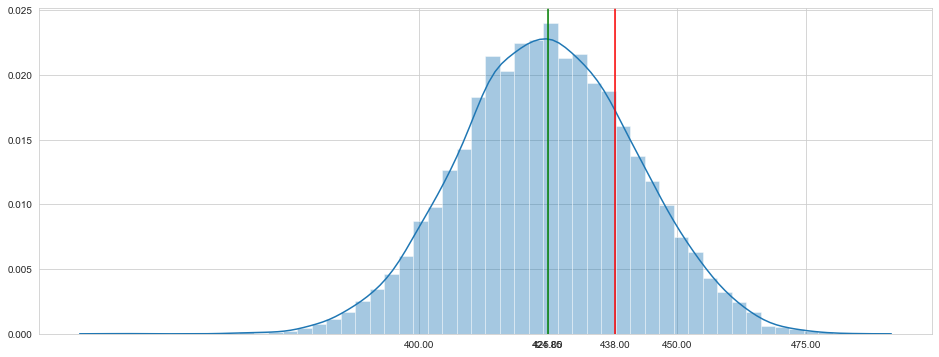

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(16, 6))
sns.distplot(total_trial_durations, ax=ax)
ax.axvline(np.mean(total_trial_durations), color='green')
ax.axvline(duration_left, color='red')
ax.set_xticks([400, 425, np.mean(total_trial_durations), duration_left, 450, 475])
fig.show()

In [6]:
c = 0
total_trial_duration = duration_left + 1
while (((duration_left - total_trial_duration) < 0) or
       ((duration_left - total_trial_duration) > 1)):
    durations = {}
    for stage, range_ in ranges.items():
        # using uniform distributions...
        durations[stage] = np.random.randint(range_[0]*10, (range_[1]*10)+1, size=n_trials) / 10
    dur_arr = np.stack(list(durations.values()))
    total_trial_duration = dur_arr.sum()
    c += 1
    if c > 1000:
        print('No solution found.')
        break
print('{} / {}'.format(dur_arr.sum(), duration_left))

437.80000000000007 / 438.0


In [7]:
durations

{'comparison': array([5.6, 4.5, 3.7, 3.1, 5.5, 5.8, 5.9, 4.1, 4.6, 4.1, 3.6, 2.1, 5.3,
        5.7, 5.6, 4.3, 2.1, 2.1, 4. , 3.7, 4.2, 4.1, 2.3, 5.2, 3.9]),
 'equation': array([4.4, 3.1, 3.1, 4.6, 3.8, 3.7, 5. , 2.3, 3. , 4.7, 2.5, 2.2, 4.6,
        4.7, 4.1, 3.4, 2.3, 2.8, 3.7, 4.3, 3.8, 4.7, 4.2, 4.3, 2.4]),
 'feedback': array([1.5, 0.9, 0.8, 0.6, 1.1, 1.1, 1.3, 0.6, 1.1, 1.1, 1. , 0.8, 1.3,
        1.3, 1.1, 1.4, 0.8, 0.9, 0.8, 0.8, 1.5, 1. , 0.5, 0.8, 0.6]),
 'isi1': array([1.3, 1.8, 0.6, 1.4, 0.8, 2.2, 1.9, 1.4, 2.2, 1.3, 1.1, 0.5, 1.4,
        2.5, 1.3, 1.1, 2.5, 1.2, 2.1, 1.6, 1.1, 1.1, 2.2, 0.5, 1.4]),
 'isi2': array([0.7, 0.9, 1.8, 1.8, 0.7, 2.5, 0.9, 1.8, 1. , 1.9, 1.5, 1.9, 0.5,
        2. , 0.8, 2.5, 0.7, 2.4, 2.2, 1.9, 1.3, 1. , 0.8, 1.6, 1.1]),
 'iti': array([ 6.9,  8.7,  8.7,  9.3,  6.9,  2.7,  5.2,  4.8,  2.2,  3.3,  7.8,
         7.4,  7.8,  1.7,  8.5,  4.1,  2.8,  5.8,  2.5,  4.4,  4.1,  6.8,
         8.3,  2.9, 10. ])}

In [8]:
# Make events dataframe
onset_counter = LEAD_IN_DURATION
equation_onsets, comparison_onsets, feedback_onsets = [], [], []

for i_trial in range(len(durations['comparison'])):
    equation_onsets.append(onset_counter)
    onset_counter += (durations['equation'][i_trial] + durations['isi1'][i_trial])
    comparison_onsets.append(onset_counter)
    onset_counter += (durations['comparison'][i_trial] + durations['isi2'][i_trial])
    feedback_onsets.append(onset_counter)
    onset_counter += (durations['feedback'][i_trial] + durations['iti'][i_trial])

In [9]:
import pandas as pd
equation_df = pd.DataFrame(columns=['onset', 'duration', 'trial_type'])
equation_df['onset'] = equation_onsets
equation_df['duration'] = durations['equation']
equation_df['trial_type'] = 'equation'

comparison_df = pd.DataFrame(columns=['onset', 'duration', 'trial_type'])
comparison_df['onset'] = comparison_onsets
comparison_df['duration'] = durations['comparison']
comparison_df['trial_type'] = 'comparison'

feedback_df = pd.DataFrame(columns=['onset', 'duration', 'trial_type'])
feedback_df['onset'] = feedback_onsets
feedback_df['duration'] = durations['feedback']
feedback_df['trial_type'] = 'feedback'

df = pd.concat((equation_df, comparison_df, feedback_df), axis=0)
df = df.sort_values(by='onset')
df.reset_index(drop=True, inplace=True)
df.head()

,onset,duration,trial_type
0,6.0,4.4,equation
1,11.7,5.6,comparison
2,18.0,1.5,feedback
3,26.4,3.1,equation
4,31.3,4.5,comparison


/Users/tsalo/.local/lib/python3.6/site-packages/scikit_learn-0.21.2-py3.6-macosx-10.7-x86_64.egg/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
<string>:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
<string>:6: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


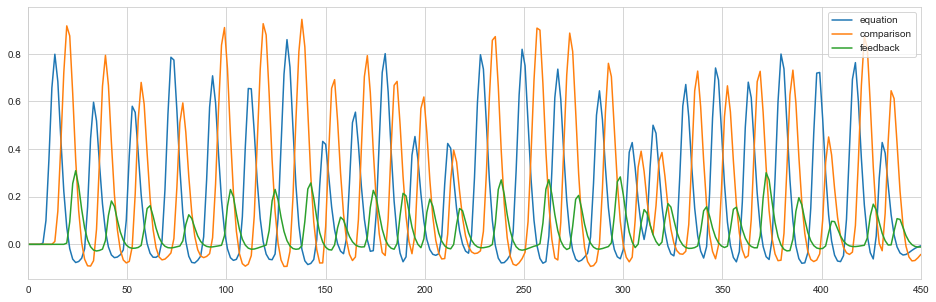

In [10]:
# Plot predicted time courses
from nistats.design_matrix import make_first_level_design_matrix
vol_times = np.linspace(0, 450, (450/1.5) + 1)
design_matrix = make_first_level_design_matrix(
    frame_times=vol_times,
    events=df, drift_model=None,
    hrf_model='spm')

fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(vol_times, design_matrix['equation'], label='equation')
ax.plot(vol_times, design_matrix['comparison'], label='comparison')
ax.plot(vol_times, design_matrix['feedback'], label='feedback')
ax.set_xlim(0, 450)
ax.legend()
fig.show()

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


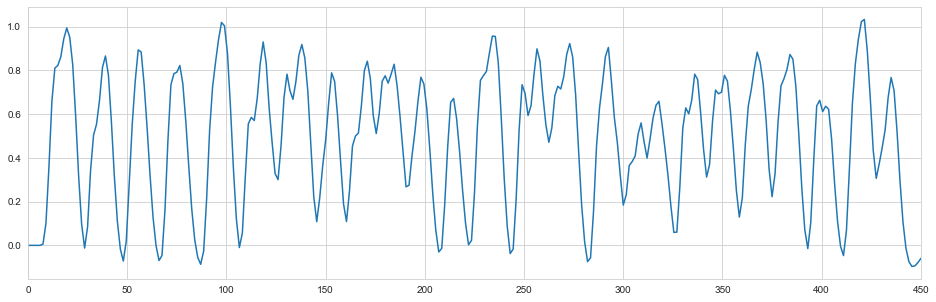

In [11]:
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(vol_times, design_matrix['equation'] + design_matrix['comparison'] + design_matrix['feedback'])
ax.set_xlim(0, 450)
fig.show()